In [35]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle


In [10]:
!pip install pillow

In [11]:
# importing the neccesarry data loading libraries
import numpy as np
import pandas as pd
import os, shutil
import cv2 

In [12]:
#getting the current working directory
cwd= os.getcwd()
cwd

'/Users/user/Documents/trial/IMAGE CLASS/image-classsification-intel'

In [30]:
# getting the items in the directory
dirs= os.listdir('data/seg_train')
print(dirs)

['forest', 'buildings', '.DS_Store', 'glacier', 'street', 'mountain', 'sea']


In [14]:
# listing the items in the test data
os.listdir('data/seg_test')

['forest', 'buildings', '.DS_Store', 'glacier', 'street', 'mountain', 'sea']

In [15]:
# listing the items in the train data

os.listdir('data/seg_train')

['forest', 'buildings', '.DS_Store', 'glacier', 'street', 'mountain', 'sea']

In [16]:
# listing the items in the predictions data, getting the first 20 items

os.listdir('data/seg_pred/')[:20]

['63.jpg',
 '24084.jpg',
 '13628.jpg',
 '3578.jpg',
 '10321.jpg',
 '10447.jpg',
 '12250.jpg',
 '1409.jpg',
 '23099.jpg',
 '9041.jpg',
 '11995.jpg',
 '4203.jpg',
 '9727.jpg',
 '77.jpg',
 '24090.jpg',
 '837.jpg',
 '3544.jpg',
 '13614.jpg',
 '7044.jpg',
 '17300.jpg']

In [17]:
# a function to get the working directory and find the number of files in it
def len_data(filename):
    buildings_data = os.listdir(filename+'/buildings')
    forest_data = os.listdir(filename+'/forest')
    glacier_data = os.listdir(filename+'/glacier')
    mountain_data = os.listdir(filename+'/mountain')
    sea_data = os.listdir(filename+'/sea')
    street_data = os.listdir(filename+'/street')

    value = []
    for data in [buildings_data,forest_data,glacier_data,mountain_data,sea_data,street_data]:
        value.append(len(data))
        
    return sum(value)


In [18]:
filename = 'data/seg_train/'
print('Total Images in Training set : ' + str(len_data(filename)))

Total Images in Training set : 14034


In [19]:
filename = 'data/seg_test/'
print('Total Images in Training set : ' + str(len_data(filename)))

Total Images in Training set : 3000


In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [21]:
def plot_data(filename):
    buildings_data = os.listdir(filename+'/buildings')
    forest_data = os.listdir(filename+'/forest')
    glacier_data = os.listdir(filename+'/glacier')
    mountain_data = os.listdir(filename+'/mountain')
    sea_data = os.listdir(filename+'/sea')
    street_data = os.listdir(filename+'/street')

    value = []
    for data in [buildings_data,forest_data,glacier_data,mountain_data,sea_data,street_data]:
        value.append(len(data))
    
    sns.barplot(['Buildings','Forest','Glacier','Mountain','Sea','Street'],value, palette = 'plasma')
    plt.title(filename.split('/')[1])


/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


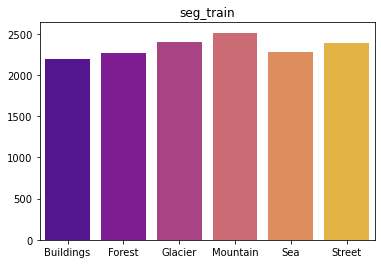

In [22]:
filename = 'data/seg_train/'
plot_data(filename)

/Users/user/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


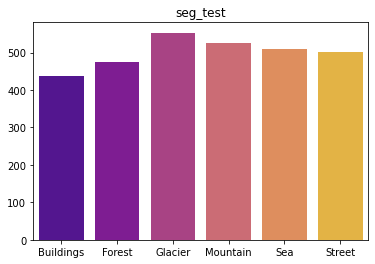

In [23]:
filename = 'data/seg_test/'
plot_data(filename)


In [24]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    
    folder1 = folder + '\\buildings'
    for filename in os.listdir(folder1)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder1,filename))
        if img is not None:
            images.append(img)
            
    folder2 = folder + '\\forest'
    for filename in os.listdir(folder2)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder2,filename))
        if img is not None:
            images.append(img)
    
    folder3 = folder + '\\glacier'
    for filename in os.listdir(folder3)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder3,filename))
        if img is not None:
            images.append(img)
            
    folder4 = folder + '\\mountain'
    for filename in os.listdir(folder4)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder4,filename))
        if img is not None:
            images.append(img)
            
    folder5 = folder + '\\sea'
    for filename in os.listdir(folder5)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder5,filename))
        if img is not None:
            images.append(img)
    
    folder6 = folder + '\\street'
    for filename in os.listdir(folder6)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder6,filename))
        if img is not None:
            images.append(img)
    return images

In [40]:
images = load_images_from_folder('seg_train')

FileNotFoundError: [Errno 2] No such file or directory: 'seg_train\\buildings'

In [26]:
# File paths
train_dir = 'data/seg_train'
test_dir = 'data/seg_test'

# Getting the sub classes of the images
class_names = os.listdir(train_dir)

# Creating labels for the sub classes
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

# Setting the directories for the subclasses
train_bgs = 'data/seg_train/buildings'
train_ft = 'data/seg_train/forest'
train_glcr = 'data/seg_train/glacier'
train_mt = 'data/seg_train/mountain'
train_sea = 'data/seg_train/sea'
train_st = 'data/seg_train/street'

# Creating objects that stores all images for each of the subclasses
bgs_train_img = [file for file in os.listdir(train_bgs) if file.endswith('.jpg')]
ft_train_img = [file for file in os.listdir(train_ft) if file.endswith('.jpg')]
glc_train_img = [file for file in os.listdir(train_glcr) if file.endswith('.jpg')]
mt_train_img = [file for file in os.listdir(train_mt) if file.endswith('.jpg')]
sea_train_img = [file for file in os.listdir(train_sea) if file.endswith('.jpg')]
st_train_img = [file for file in os.listdir(train_st) if file.endswith('.jpg')]

# Looping through each of the created images to create one larger object
## that houses all the training images
train_imgs = []
for image in bgs_train_img:
    train_imgs.append(image)
for image in ft_train_img:
    train_imgs.append(image)
for image in glc_train_img:
    train_imgs.append(image)
for image in mt_train_img:
    train_imgs.append(image)
for image in sea_train_img:
    train_imgs.append(image)
for image in st_train_img:
    train_imgs.append(image)

In [44]:
def get_images(directory):
    """ A function to extract images from the file directory"""
    Images = []
    Labels = []
    
    # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    #Main Directory where each class label is present as folder name
    if os.listdir(directory) != 'data/seg_train/.DS_Store':
        for labels in os.listdir(directory):
            # Folder contain Glacier Images get the '2' class label and so on...
            if labels == 'glacier': 
                label = 2
            elif labels == 'sea':
                label = 4
            elif labels == 'buildings':
                label = 0
            elif labels == 'forest':
                label = 1
            elif labels == 'street':
                label = 5
            elif labels == 'mountain':
                label = 3
            
            # Extracting the file name of the image from Class Label folder
            for image_file in os.listdir(directory+labels):
                
                # Reading the image (OpenCV) 
                image = cv2.imread(directory+labels+r'/'+image_file) 
                
                # Resize the image, Some images are different sizes. (Resizing is very Important)
                image = cv2.resize(image,(150,150))
                
                # Appending  to the list of images and labels created above
                Images.append(image)
                Labels.append(label)
    
    # Shuffle the dataset you just prepared
    return shuffle(Images,Labels,random_state=42)

In [45]:
# get_images('data/seg_train/')
train_imgs, train_labels = get_images('data/seg_train/')

NotADirectoryError: [Errno 20] Not a directory: 'data/seg_train/.DS_Store'

In [42]:
os.getcwd()

'/Users/user/Documents/trial/IMAGE CLASS/image-classsification-intel'

In [43]:
os.listdir('data')

['.DS_Store', 'seg_test', 'seg_train', 'seg_pred']